In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
#Reading the Datasets:
df_train = pd.read_csv("C:\Projects\Projects for Submission\Project 1 - Mercedes-Benz Greener Manufacturing\Dataset for the project\\train.csv")
df_test = pd.read_csv("C:\Projects\Projects for Submission\Project 1 - Mercedes-Benz Greener Manufacturing\Dataset for the project\\test.csv")



# Declaring Empty lists for various operations
string_columns = []
numerical_columns = []

uniques_train = []
nulls_train = 0

uniques_test = []
nulls_test = 0


#Finding no of Unique Values per Column, no of Null Values , String Columns , Numerical Columns
for i in df_train.drop("y",axis = 1).columns:
    uniques_train.append(df_train[i].nunique())
    nulls_train += df_train[i].isna().sum()  
    
    uniques_test.append(df_test[i].nunique())
    nulls_test += df_test[i].isna().sum()
    
    if df_train[i].dtype == object :
        string_columns.append(i)
                
    else:
        numerical_columns.append(i)


#Creating a DataFrame For No of Unique Values Per Column For both Train and Test Datasets
df_uniques = pd.DataFrame(data = np.array(uniques_train+uniques_test).reshape(2,377) ,index = ["Train","Test"], columns = np.array(df_test.columns))


# Printing Unique values and null values
print('\033[1m'+"\nThe number of uniqe values for both Test and Train Datasets for each colums are :")
display(df_uniques)
print('\033[1m' + "No. of null values in train Dataset are : " + str(nulls_train) + "\nNo. of null values in test Dataset are : "  + str(nulls_test) )



# LabelEncoding the string columns for both train and test Datasets
LE = LabelEncoder()
for i in string_columns:
    df_train[i] = LE.fit_transform(df_train[i])
    df_test[i] = LE.fit_transform(df_test[i])

    
# Removing the columns with Zero Variance
for i in df_test.columns:
    if df_train[i].var()== 0:
        df_train.drop(i, axis=1, inplace= True)
        df_test.drop(i, axis=1, inplace= True)
        

# Applying Dimentionality Reduction        
x = df_train.drop(["y", "ID"],axis=1)
test = df_test.drop(["ID"],axis=1)
y = df_train["y"]


# Instanciating the XGBRegressor and the PCA
pca= PCA(n_components=10)
model= XGBRegressor(random_state=27)

# Fitting the data using the PCA and Transforming Using XGBRegressor
x_pca= pca.fit_transform(x)
df_test_pca= pca.transform(test)
model.fit(x_pca, y)
predictions= model.predict(df_test_pca)

print("\npredictions ="+'\033[0m',predictions)


The number of uniqe values for both Test and Train Datasets for each colums are :


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
Train,4209,47,27,44,7,4,29,12,25,2,...,2,2,2,2,2,2,2,2,2,2
Test,4209,49,27,45,7,4,32,12,25,2,...,2,2,2,2,2,2,2,2,2,2


No. of null values in train Dataset are : 0
No. of null values in test Dataset are : 0

predictions = [ 80.58816   93.68892   93.33464  ...  93.23253  110.784546  96.816956]


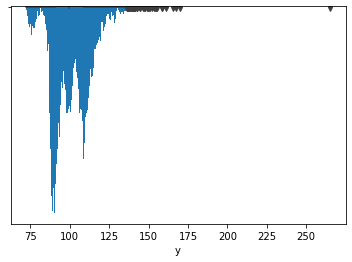

In [16]:
import seaborn as sns
df_test2_list= list(test)
sns.boxplot(df_train["y"])
plt.hist(df_train["y"], bins = 300)
plt.show()

[Text(0.5, 0, 'Top 10 feature importance'), Text(0, 0.5, 'Feature importance')]

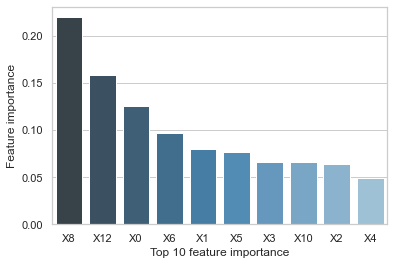

In [60]:
import numpy as np
feature_imps = np.argsort(model.feature_importances_)[::-1]
X = []
Y = []

for i in feature_imps:
    X.append(x.columns[i])
    Y.append(model.feature_importances_[i])

ax = sns.barplot(X , Y , palette="Blues_d")
ax.set(xlabel = "Top 10 feature importance", ylabel = "Feature importance")

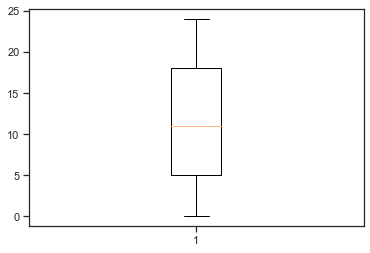

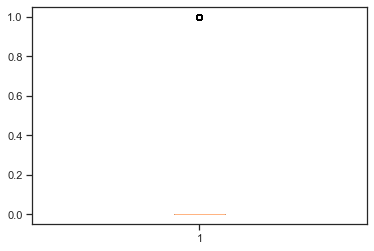

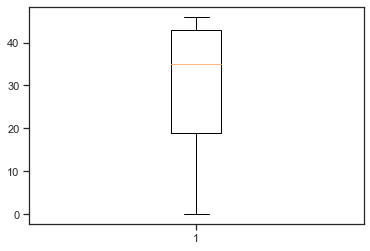

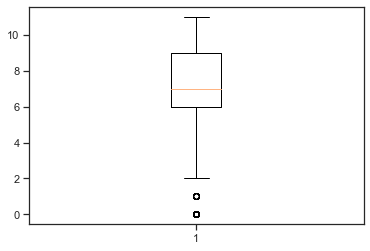

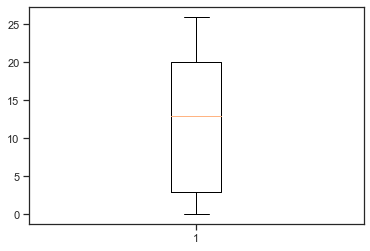

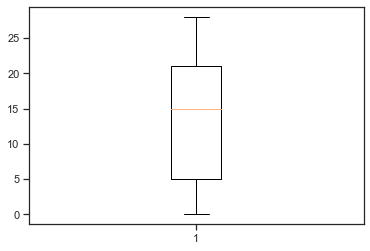

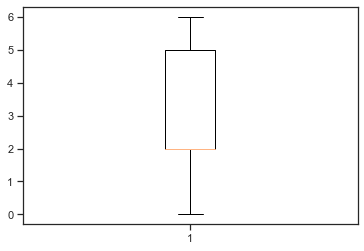

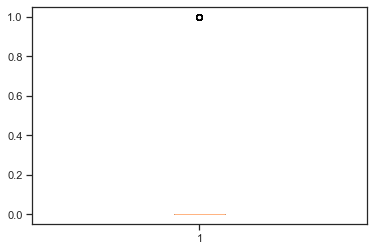

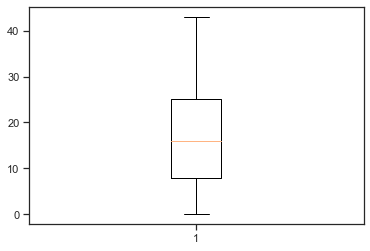

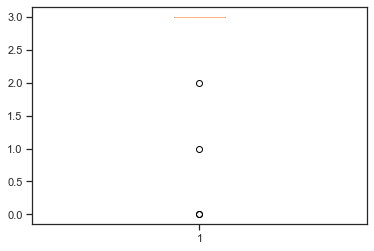

In [73]:
for i in X:
    plt.figure()
    plt.boxplot(df_train[i])